In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
import random
from sklearn.cluster import KMeans
plt.style.use("fivethirtyeight")

def gauss2D(x,m,C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * dC
    return num/den

def twoDGaussianPlot(nx,ny,m,C):
    x = np.linspace(-10,10,nx)
    y = np.linspace(-10,10,ny)
    X,Y = np.meshgrid(x,y,indexing="ij")
    Z = np.zeros([nx,ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec,m,C)
    return X,Y,Z

def genGaussianSamples(N, m, C):
    A = np.linalg.cholesky(C)
    U = np.random.randn(N,2)
    return(U @ A.T + m)

Means = np.array([[0, 3], [3, 0], [4,4]]) # Define three means

CovMatrices = np.zeros((3,2,2)) # Define three covariance matrices ensuring they are positive definite
for j in range(3):
    CovMatrices[j,:,:] = make_spd_matrix(2)

w = np.random.rand(3) # Priors
w = w / np.sum(w)

nData = np.floor(w * 1000).astype(int) # How many data in each component (1000 in total)

X0 = genGaussianSamples(nData[0], Means[0,:], CovMatrices[0,:,:]) # Draw samples from each component
X1 = genGaussianSamples(nData[1], Means[1,:], CovMatrices[1,:,:])
X2 = genGaussianSamples(nData[2], Means[2,:], CovMatrices[2,:,:])

X = np.append(np.append(X0, X1, axis=0), X2, axis=0) # Append into an array for the data we need

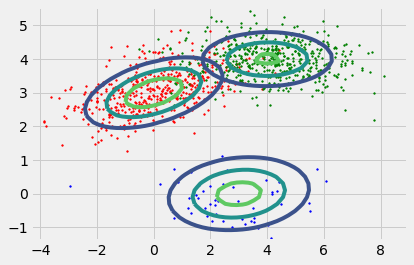

In [275]:
plt.xlim(min(X[:,0]), max(X[:,0]))
plt.ylim(min(X[:,1]), max(X[:,1]))

plt.scatter(X0[:,0], X0[:,1], s=3,c="r")
plt.scatter(X1[:,0], X1[:,1], s=3,c="b")
plt.scatter(X2[:,0], X2[:,1], s=3,c="g")

for i in range(3):
    Xp,Yp,Zp = twoDGaussianPlot(100,100,Means[i],CovMatrices[i])
    plt.contour(Xp,Yp,Zp,3)

In [163]:
def distance(x,y):
    # Given two data points, calculates the Euclidean distance between them
    dist = 0
    for i in range(len(x)):
        if x[i] is None or y[i] is None:
            continue
        dist += (x[i]-y[i])**2
    return np.sqrt(dist)

def indexofclosest(x,centres):
    # Given a list "centres", finds which centre is closest to x and returns its index in the list
    shortest = 9999999999999
    for i in range(len(centres)):
        dist = distance(x,centres[i])
        if (dist < shortest):
            closestcentre = i
            shortest = dist
    return closestcentre

def canimprove(errors,tolerance):
    # For the main loop of kmeans2()
    if errors is None:
        return True
    for i in errors:
        if i > tolerance:
            return True
    return False

def kmeans2(X,K=3, tolerance = 0.0001):
    # K-means clustering of data X into K clusters
    centres = []
    clusters = [[] for i in range(K)] # Have a list containing the data split up into K lists according to which centre is closest
    for i in range(K):
        centres.append(random.choice(X)) # Get K random initial centres

    for coord in X: # For each item in data set, get closest centre
        index = indexofclosest(coord,centres)
        clusters[index].append(coord) # Append each coordinate to corresponding list

    for i in range(K): # Convert into a numpy array
        clusters[i] = np.asarray(clusters[i])

    centrehistory = [list(centres)] # Keep track of previous cluster centres in each iteration
    errors = None
    while canimprove(errors,tolerance):
        errors = []
        for i in range(K):
            dims = len(clusters[0][0])
            sumofpoints = [0 for i in range(dims)] # num of dimensions
            itemswithdim = [0 for i in range(dims)] # num of items in this cluster whose entry in dimenion is defined
            for item in clusters[i]:
                for dim in range(dims):
                    if item[dim] is not None:
                        sumofpoints[dim] += item[dim]
                        itemswithdim[dim] += 1
            for dim in range(dims):
                sumofpoints[dim] /= itemswithdim[dim]

            errors.append(distance(sumofpoints,centres[i]))
            centres[i] = (sumofpoints)

        centrehistory.append(list(centres))

        clusters = []
        for i in range(K):
            clusters.append([])

        for coord in X:
            index = indexofclosest(coord,centres)
            clusters[index].append(coord)
        for i in range(K):
            clusters[i] = np.asarray(clusters[i])
          
    return (centres, clusters,centrehistory)
        
centres, clusters, centrehistory = kmeans2(X,3)



In [306]:
total = 0
for i in range(3):
    cluster = clusters[i]
    for x in cluster:
        if x in X0 and i == 1:
            total += 1
        if x in X1 and i == 2:
            total += 1
        if x in X2 and i == 0:
            total += 1
print(total)
print(len(X))

906
998


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


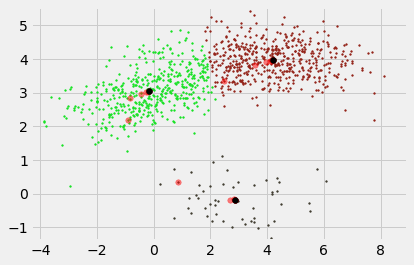

In [298]:

'''for i in range(3):
    Xp,Yp,Zp = twoDGaussianPlot(100,100,Means[i],CovMatrices[i])
    plt.contour(Xp,Yp,Zp,3,alpha=0.7)'''

plt.xlim(min(X[:,0]), max(X[:,0]))
plt.ylim(min(X[:,1]), max(X[:,1]))

for i in clusters:
    plt.scatter(i[:,0], i[:,1], s=3,c=np.random.rand(3,))
for i in centrehistory:
    centres2 = np.asarray(i)
    plt.scatter(centres2[:,0],centres2[:,1],s=30,c="red",alpha=0.5)
    
centres2 = np.asarray(centres)
plt.scatter(centres2[:,0],centres2[:,1],s=35,c="black")



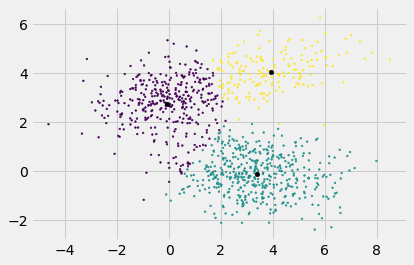

In [268]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clusters_sklearn = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters_sklearn, s=3)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20)

801 of 998
831 of 998


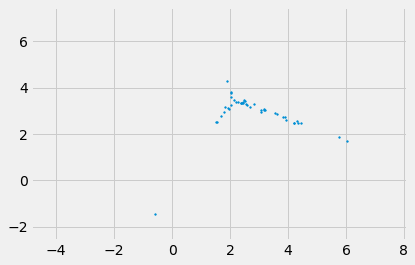

In [260]:
total = 0
for i in range(3):
    cluster = clusters[i]
    for x in cluster:
        if x in X0 and i == 0:
            total += 1
        if x in X1 and i == 2:
            total += 1
        if x in X2 and i == 1:
            total += 1
print(total, "of", len(X))


total = 0
clusters2 = [[] for i in range(max(clusters_sklearn+1))]
for i in range(len(clusters_sklearn)):
    clusters2[clusters_sklearn[i]].append(X[i])
for i in range(3):
    cluster = clusters2[i]
    for x in cluster:
        if x in X0 and i == 1:
            total += 1
        if x in X1 and i == 2:
            total += 1
        if x in X2 and i == 0:
            total += 1
            
            
print(total, "of", len(X))

#print(np.isin(i,clusters2[1]))
#print(clusters[0][0] not in (clusters2[1]))
      
diff = []
for i in clusters[0]:
    if not any([all(i==j) for j in clusters2[1]]):#if np.isin(i,clusters2[1]):#if i not in clusters2[1]:
        diff.append(i)
for i in clusters[2]:
    if not any([all(i==j) for j in clusters2[2]]):#if np.isin(i,clusters2[2]):#if i not in clusters2[2]:
        diff.append(i)
for i in clusters[1]:
    if not any([all(i==j) for j in clusters2[0]]):#if np.isin(i,clusters2[0]):#if i not in clusters2[0]:
        diff.append(i)
diff = np.array(diff)
#print(diff)


plt.xlim(min(X[:,0]), max(X[:,0]))
plt.ylim(min(X[:,1]), max(X[:,1]))
plt.scatter(diff[:, 0], diff[:, 1], s=3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


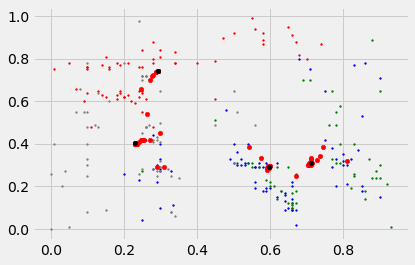

In [312]:
file = open("lab6 data.csv","r")
lines = file.readlines()
data = []
targets = []
for x in lines:
    line = x.split(",")
    if line[0] == 'ï»¿0':
        line[0] = "0"
    for i in range(5):
        line[i] = float(line[i])
    data.append(line[:5])
    targets.append(line[5])
    

dim1 = 4
dim2 = 3

colormap = {0:"r",1:"b",2:"g",3:"grey",4:"white"}
    
centres, clusters, centrehistory = kmeans2(data,4)
for i in clusters:
    plt.scatter(i[:,dim1], i[:,dim2], s=3,c=colormap[clusters.index(i)])
for i in centrehistory:
    centres2 = np.asarray(i)
    plt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="red")
    
centres2 = np.asarray(centres)
plt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="black")

[2 2 2 1 1 2 2 1 1 2 3 1 1 3 3 3 1 2 2 2 1 2 2 1 1 3 1 1 0 3 3 1 1 2 2 2 1
 2 1 1 1 3 3 1 1 3 3 3 0 2 2 2 1 2 2 1 1 3 3 1 1 3 3 1 1 2 2 2 2 2 2 2 1 3
 3 1 1 3 1 1 1 2 2 1 1 1 2 1 1 3 3 1 1 3 3 1 1 2 2 2 1 2 2 1 1 3 3 3 1 3 3
 3 0 2 2 2 1 0 3 3 1 1 3 3 3 0 3 3 1 1 2 2 1 0 2 2 1 1 3 1 1 1 3 3 3 0 2 1
 1 0 2 2 1 1 3 3 3 0 3 3 1 1 2 2 1 2 2 3 1 2 3 3 3 1 3 3 1 0 2 2 1 0 3 2 1
 1 3 3 1 0 3 3 3 0 2 2 1 1 2 1 1 0 1 1 0 1 3 3 1 0 2 2 0 0 3 2 1 0 3 3 1 0
 3 3 1 0 2 2 0 0 2 2 1 0 3 3 1 3 3 3 1 0 2 2 1 0 3 2 0 0 3 3 1 0 3 3 1 0]


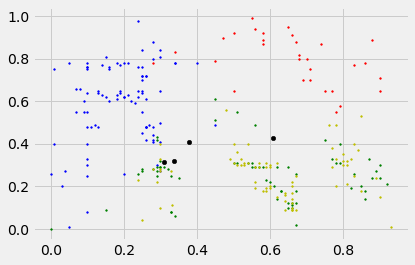

In [34]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
clusters_sklearn = kmeans.predict(data)
print(clusters_sklearn)
clusters = [[],[],[],[]]
for i in range(len(clusters_sklearn)):
    clusters[clusters_sklearn[i]].append(data[i])
for i in range(4):
    clusters[i] = np.array(clusters[i])
    
#print(clusters)
#plt.scatter(clusters_sklearn[:, 0], clusters_sklearn[:, 1], c=clusters_sklearn, s=3, cmap='viridis')
#print(np.array(clusters[0])[:,0])
dim1 = 4
dim2 = 3

plt.scatter(clusters[0][:, dim1], clusters[0][:, dim2], c="r", s=3)
plt.scatter(clusters[1][:, dim1], clusters[1][:, dim2], c="b", s=3)
plt.scatter(clusters[2][:, dim1], clusters[2][:, dim2], c="g", s=3)
plt.scatter(clusters[3][:, dim1], clusters[3][:, dim2], c="y", s=3)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20)

In [8]:
'''dim1 = 0
dim2 = 1
for i in clusters:
    plt.scatter(i[:,dim1], i[:,dim2], s=3,c=np.random.rand(3,))
    
for i in centrehistory:
    centres2 = np.asarray(i)
    plt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="red",alpha=0.3)
    
centres2 = np.asarray(centres)
plt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="black")'''

'dim1 = 0\ndim2 = 1\nfor i in databyclosest:\n    plt.scatter(i[:,dim1], i[:,dim2], s=3,c=np.random.rand(3,))\n    \nfor i in centrehistory:\n    centres2 = np.asarray(i)\n    plt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="red",alpha=0.3)\n    \ncentres2 = np.asarray(centres)\nplt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="black")'

In [40]:
file = open("Live.csv","r")
lines = file.readlines()
data = []
targets = []
for line in lines[1:]:
    splitline = line.split(",")
    data.append([int(i) for i in splitline[3:]])
    targets.append(splitline[1])
    
centres, clusters, centrehistory = kmeans2(data,4)
print("done")

done


In [229]:
#https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

file = open("weatherAUS.csv","r")
lines = file.readlines()
file.close()
data = []
targets = []
titles = lines[0].split(",")
titles = titles[2:7] + [titles[8]] +titles[11:21] + [titles[22]]
for line in lines[1:]:
    splitline = line.split(",")
    target = splitline[-1]
    if splitline[-1] == "No\n":
        targets.append(0)
    else:
        targets.append(1)
    splitline = splitline[2:7] + [splitline[8]] +splitline[11:21] + [splitline[22]]
    for i in range(17):
        if splitline[i] == "NA":
            splitline[i] = None
        else:
            splitline[i] = float(splitline[i])
    data.append(splitline)
    
data = data[:20000]
targets = targets[:20000]

centres, clusters, centrehistory = kmeans2(data,2)
print(titles)
print("done")


done


{0: 'MinTemp', 1: 'MaxTemp', 2: 'Rainfall', 3: 'Evaporation', 4: 'Sunshine', 5: 'WindGustSpeed', 6: 'WindSpeed9am', 7: 'WindSpeed3pm', 8: 'Humidity9am', 9: 'Humidity3pm', 10: 'Pressure9am', 11: 'Pressure3pm', 12: 'Cloud9am', 13: 'Cloud3pm', 14: 'Temp9am', 15: 'Temp3pm', 16: 'RISK_MM'}


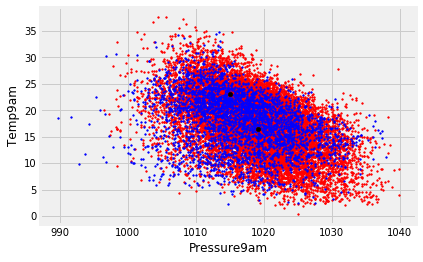

In [311]:
dim1 = 10
dim2 = 14

colormap = {0:"r",1:"b",2:"g",3:"grey",4:"white"}
titlemap = {}
for i in range(17):
    titlemap[i] = titles[i]
    
rain = []
norain = []
for i in range(len(data)):
    if targets[i] == 1:
        rain.append(data[i])
    else:
        norain.append(data[i])
rain = np.array(rain)
norain = np.array(norain)
plt.scatter(norain[:,dim1],norain[:,dim2],c="r",s=3)
plt.scatter(rain[:,dim1],rain[:,dim2],c="b",s=3)
for i in clusters:
    #plt.scatter(i[:,dim1], i[:,dim2], s=3,c=colormap[clusters.index(i)])
    plt.xlabel(titlemap[dim1])
    plt.ylabel(titlemap[dim2])
for i in centrehistory:
    centres2 = np.asarray(i)
    plt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="red")
    
centres2 = np.asarray(centres)
plt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="black")
print(titlemap)

In [283]:
tp = 0
fp = 0
tn = 0
fn = 0
count = 0
for i in range(20000):
    try:
        #cluster0 = rain
        #cluster1 = no rain
        count += 1
        if targets[i] == 0: # If no rain
            if any([all([data[i][j] == x[j] for j in range(17)]) for x in clusters[1]]):
                tn += 1
            else:
                fn += 1
        elif targets[i] == 1: # If rain
            if any([all([data[i][j] == x[j] for j in range(17)]) for x in clusters[0]]):
                tp += 1
            else:
                fp += 1
        if i % 100 == 0:
            print(i)
    except KeyboardInterrupt:
            print(acc1,acc2,acc1+acc2,count)
            raise error
print(tp,tn,fp,fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print(precision,recall,2*(precision*recall)/(precision+recall))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [288]:
tp1 = tn
tn1 = tp
fp1 = fn
fn1 = fp
precision1 = tp1/(tp1+fp1)
recall1 = tp1/(tp1+fn1)
print(2*(precision*recall)/float(precision+recall))
print(2*(precision1*recall1)/float(precision1+recall1))
print((tp1+tn1)/(tp1+fp1+tn1+fn1))

attrnum = 0
nones = 0
for i in range(len(data)):
    for j in range(17):
        attrnum += 1
        if data[i][j] == None:
            nones += 1
print(nones,attrnum,nones/float(attrnum))


normdata = data
normdata = np.array(normdata)
for i in range(17):
    excludenone = normdata[:,i][normdata[:,i] != None]
    mean = np.mean(excludenone)
    std = np.std(excludenone)
    print(i, std)
        

0.11057692307692307
0.7203601472134594
0.5745
62308 340000 0.18325882352941175
0 6.033387916943094
1 6.443863412180656
2 9.878829337519237
3 5.470977538512901
4 3.7534862093559016
5 13.02788433770695
6 8.89659372718814
7 9.130178549625029
8 18.337753658364424
9 21.333923564230503
10 6.62459066862129
11 6.545417394134709
12 3.0646848757156833
13 2.7807764057009714
14 5.677996862442796
15 6.285162313822775
16 9.864273974924538


In [213]:
def kmeans2(X,K=3, tolerance = 0.0001): # VERSION WITH NORMALISATION
    
    normdata = X
    normdata = np.array(normdata)
    for i in range(17):
        excludenone = normdata[:,i][normdata[:,i] != None]
        mean = np.mean(excludenone)
        std = np.std(excludenone)
        for j in range(len(normdata)):
            if normdata[j][i] != None:
                normdata[j][i] = (normdata[j][i] - mean)/std + 1
    Xnorm = normdata
        
    # K-means clustering of data X into K clusters
    centres = []
    centresnorm = []
    clusters = [[] for i in range(K)] # Have a list containing the data split up into K lists according to which centre is closest
    clustersnorm = [[] for i in range(K)]
    for i in range(K):
        index = random.choice(range(len(X)))
        centres.append(X[index]) # Get K random initial centres
        centresnorm.append(Xnorm[index])

        
    for i in range(len(Xnorm)): # For each item in data set, get closest centre
        coord = Xnorm[i]
        index = indexofclosest(coord,centresnorm)
        clustersnorm[index].append(coord) # Append each coordinate to corresponding list
        clusters[index].append( list(X[i]) )
        

        
            
    for i in range(K): # Convert into a numpy array
        #clusters[i] = np.asarray(clusters[i])
        clustersnorm[i] = np.asarray(clustersnorm[i])

    centrehistory = [list(centres)] # Keep track of previous cluster centres in each iteration
    errors = None
    dims = len(clusters[0][0])
    while canimprove(errors,tolerance):
        errors = []
        for i in range(K): # Go through each cluster
            sumofpoints = [0 for i in range(dims)] # num of dimensions
            itemswithdim = [0 for i in range(dims)] # num of items in this cluster whose entry in dimenion is defined
            for item in clustersnorm[i]:
                for dim in range(dims):
                    if item[dim] is not None:
                        sumofpoints[dim] += item[dim]
                        itemswithdim[dim] += 1
            for dim in range(dims):
                if itemswithdim[dim] != 0:
                    sumofpoints[dim] /= itemswithdim[dim]
                else:
                    print(sumofpoints[dim],itemswithdim[dim])
                    print("AAA")
                    sumofpoints[dim] = None

            errors.append(distance(sumofpoints,centresnorm[i]))
            centresnorm[i] = (sumofpoints)
            
            sumofpoints = [0 for i in range(dims)] # num of dimensions
            itemswithdim = [0 for i in range(dims)] # num of items in this cluster whose entry in dimenion is defined
            for item in clusters[i]:
                for dim in range(dims):
                    if item[dim] is not None:
                        sumofpoints[dim] += item[dim]
                        itemswithdim[dim] += 1
            for dim in range(dims):
                if itemswithdim[dim] != 0:
                    sumofpoints[dim] /= itemswithdim[dim]
                else:
                    sumofpoints[dim] = None
            centres[i] = sumofpoints

        centrehistory.append(list(centres))

        clusters = [[] for i in range(K)]
        clustersnorm = [[] for i in range(K)]

        for i in range(len(Xnorm)):
            coord = Xnorm[i]
            index = indexofclosest(coord,centresnorm)
            clustersnorm[index].append(coord)
            clusters[index].append( list(X[i]) )#Xnorm.index(coord)] )
        for i in range(K):
            clusters[i] = np.asarray(clusters[i])
            clustersnorm[i] = np.asarray(clustersnorm[i])
            
        return (centres, clusters, centrehistory)
    

centres, clusters, centrehistory = kmeans2(data,2)
print(clusters)

[array([[13.4, 22.9, 0.6, ..., 16.9, 21.8, 0.0],
       [7.4, 25.1, 0.0, ..., 17.2, 24.3, 0.0],
       [12.9, 25.7, 0.0, ..., 21.0, 23.2, 0.0],
       ...,
       [18.3, 26.1, 0.0, ..., 22.9, 24.7, 0.0],
       [21.4, 29.2, 0.0, ..., 26.0, 27.8, 2.0],
       [23.5, 30.8, 2.0, ..., 24.2, 28.1, 2.6]], dtype=object), array([[15.9, 21.7, 2.2, ..., 15.9, 17.0, 15.6],
       [14.1, 20.9, 0.0, ..., 17.2, 18.1, 16.8],
       [7.6, 24.0, 0.0, ..., 12.6, 22.0, 0.0],
       ...,
       [13.1, 22.8, 0.6, ..., 16.6, 17.9, 42.6],
       [18.1, 23.1, 0.0, ..., 20.8, 19.3, 3.4],
       [19.3, 24.8, 13.8, ..., 20.4, 24.1, 0.8]], dtype=object)]
